1. Importing libraries 

In [427]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os,random
import eda_helper_functions

Setting display options

In [428]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

2. Reading the data

In [429]:
PROJECT_DIR  = "/Users/abhisheksaurav/Desktop/real_estate_project/"
DATA_DIR = "Data Collection/Data/City/chandigarh/cleaned_data"

In [430]:
def get_data(name):
    file_name = "{}.csv".format(name)
    file_path = os.path.join(PROJECT_DIR, DATA_DIR, file_name)
    return pd.read_csv(file_path)

In [431]:
data = get_data("gurgaon_properties_cleaned_v2")

3. Premilinary Analysis of the data 

In [432]:
(
    data 
    .sample(3)
)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
2869,flat,ireo the corridors,sector 67,1.60,9264.0,1727.0,Super Built up area 1727(160.44 sq.m.)Carpet area: 1017 sq.ft. (94.48 sq.m.),3,3,2,3.0,north,New Property,1727.0,NaN,1017.0,0,0,1,0,0,2,142
3614,flat,sbtl caladium,sector 109,1.90,6219.0,3055.0,Super Built up area 3055(283.82 sq.m.),4,4,3,8.0,north-east,Relatively New,3055.0,NaN,NaN,0,1,0,0,0,0,151
400,flat,tulip petals,sector 89,1.55,10000.0,1550.0,Super Built up area 1550(144 sq.m.),3,2,3,6.0,east,Moderately Old,1550.0,NaN,NaN,0,0,1,0,0,2,111


In [433]:
# checking the shape of the data 
(
    data 
    .shape
)

(3942, 23)

- data has `3942` rows and `23` columns 

In [434]:
# checking the datatypes 

(
    data 
    .info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3942 entries, 0 to 3941
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property type        3942 non-null   object 
 1   society              3941 non-null   object 
 2   sector               3942 non-null   object 
 3   price                3922 non-null   float64
 4   price_per_sq_ft      3922 non-null   float64
 5   area                 3922 non-null   float64
 6   areaWithType         3942 non-null   object 
 7   bedRoom              3942 non-null   int64  
 8   bathroom             3942 non-null   int64  
 9   balcony              3942 non-null   object 
 10  floorNum             3940 non-null   float64
 11  facing               3651 non-null   object 
 12  agePossession        3942 non-null   object 
 13  super_built_up_area  1934 non-null   float64
 14  built_up_area        1829 non-null   float64
 15  carpet_area          2001 non-null   f

In [435]:
# checking for duplicate rows 

(
    data 
    .duplicated()
    .sum()
)

np.int64(129)

- data has around `129` duplicate rows
- dropping these duplicate rows 

In [436]:
(
    data 
    .drop_duplicates(inplace= True)
)

In [437]:
(
    data 
    .head()
)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
0,house,independent,sector 31,4.25,26235.0,1620.0,Plot area 204(170.57 sq.m.)Built Up area: 200 sq.yards (167.23 sq.m.)Carpet area: 180 sq.yards (150.5 sq.m.),5,5,3+,3.0,North-East,Moderately Old,NaN,200.0,180.0,0,0,1,1,0,2,56
1,house,independent,sector 1,1.85,16003.0,1156.0,Carpet area: 1156 (107.4 sq.m.),4,3,2,3.0,NaN,undefined,NaN,NaN,1156.0,0,0,0,0,0,0,0
2,house,independent,sector 50,12.50,40611.0,3078.0,Plot area 342(285.96 sq.m.),6,5,3,4.0,East,Moderately Old,NaN,3078.0,NaN,1,1,0,1,0,2,23
3,flat,aipl zen residences,sector 70,1.82,10996.0,1655.0,Super Built up area 1655(153.75 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1550 sq.ft. (144 sq.m.),3,3,3,12.0,south,Relatively New,1655.0,1600.0,1550.0,0,0,0,0,0,0,108
4,flat,the close north,sector 50,2.51,11992.0,2093.0,Super Built up area 2093(194.45 sq.m.),3,3,3,11.0,north-east,Moderately Old,2093.0,NaN,NaN,0,0,1,1,0,2,109


## 5. Univariate Analysis

5.1 property_type

<Axes: xlabel='property type'>

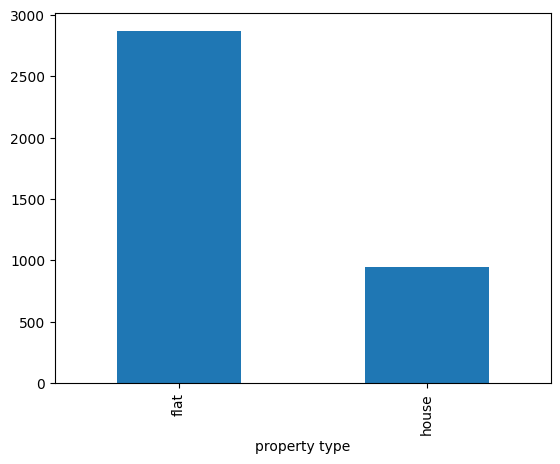

In [438]:
(
    data['property type']
    .value_counts()
    .plot(kind = 'bar')
)

In [439]:
(
    data['property type']
    .value_counts(normalize= True) * 100
)

property type
flat     75.242591
house    24.757409
Name: proportion, dtype: float64

In [440]:
(
    data['property type']
    .isnull() 
    .sum()
)

np.int64(0)

Observation 
- flats are in majority with around 75% of the data and there are less numbers of houses
- there are no missing values in the data 

5.2 Society

In [441]:
# quick glance 

(
    data
    .society
    .sample(10)
)

1090              imperia the esfera
2592                     independent
2175                 ramsons kshitij
2871            dlf new town heights
3767                  dlf the ultima
2536                   empire estate
3937           signature the roselia
816     takshila heights sector 37 c
1180                     m3m skycity
3154                  m3m golfestate
Name: society, dtype: object

In [442]:
(
    data 
    .society
    .value_counts()
)

society
independent                                          558
tulip violet                                          75
ss the leaf                                           73
shapoorji pallonji joyville gurugram                  42
dlf new town heights                                  41
signature global park                                 35
shree vardhman victoria                               34
emaar mgf emerald floors premier                      32
smart world orchard                                   32
paras dews                                            31
dlf the ultima                                        31
dlf regal gardens                                     30
m3m woodshire                                         30
shree vardhman flora                                  29
la vida by tata housing                               28
smart world gems                                      28
signature global solera                               27
godrej nature plus     

In [443]:
(
    data 
    .society
    .nunique()
)

722

Observation
- this column has high cardinality i.e. there are almost 722 categories. 
- out of 722 categories of apartments 50% of the data is coming from 75 apartments i.e almost 75 apartments have multiple flats up for sale and that's why it is coveering almost 50% of the data 

In [444]:
(
    data[data.society != 'independent']
    .society
    .value_counts(normalize= True)
    .cumsum()
    .head(75)
)

society
tulip violet                            0.023049
ss the leaf                             0.045482
shapoorji pallonji joyville gurugram    0.058390
dlf new town heights                    0.070990
signature global park                   0.081746
shree vardhman victoria                 0.092194
emaar mgf emerald floors premier        0.102028
smart world orchard                     0.111862
dlf the ultima                          0.121389
paras dews                              0.130916
m3m woodshire                           0.140135
dlf regal gardens                       0.149355
shree vardhman flora                    0.158267
smart world gems                        0.166872
la vida by tata housing                 0.175476
signature global solera                 0.183774
godrej nature plus                      0.192071
bptp terra                              0.199754
vatika gurgaon                          0.207130
experion the heartsong                  0.214505
tata primant

Observation
- out of 722 categories of apartments 50% of the data is coming from 75 apartments i.e almost 75 apartments have multiple flats up for sale and that's why it is coveering almost 50% of the data 

In [445]:
# creating bins for the number of flats in a apartment to check how many apartments have multiple flats vacant 

society_counts = (
    data 
    .society 
    .value_counts()
)

frequency_bins = {
    "Very High > 100": (society_counts > 100).sum(), 
    "High (50-100)": ((society_counts > 50) & (society_counts < 100)).sum(), 
    "Average (10-49)": ((society_counts > 10) & (society_counts < 50)).sum(), 
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(), 
    "Very Low (1)": (society_counts ==1).sum()
}

for key, value in frequency_bins.items():
    print("{}\t:\t{}".format(key, value))

Very High > 100	:	1
High (50-100)	:	2
Average (10-49)	:	86
Low (2-9)	:	287
Very Low (1)	:	340


Observation: 
- society column explains that: 
    - There are: 
        - 1 apartment with more 100 flats 
        - 2 apartments with 50-100 flats 
        - 86 apartments with 10-49 flats 
        - 287 apartments with 2-9 flats and 
        - 340 apartments with just one flat 

<Axes: xlabel='society'>

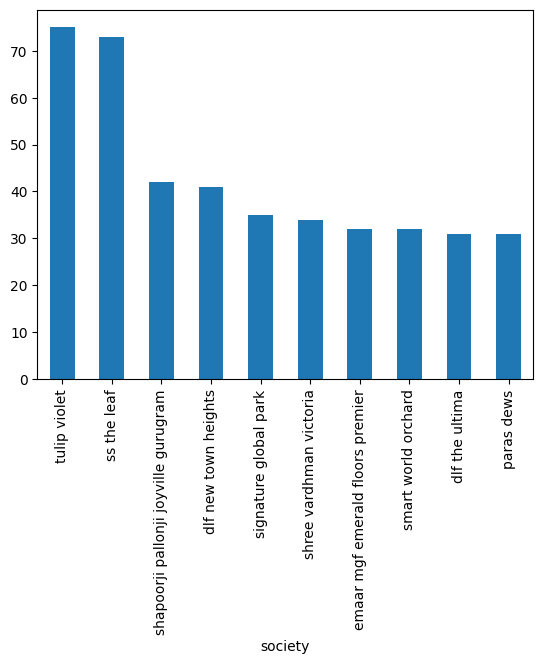

In [446]:
# top 10 societies 

(
    data[data['society'] != 'independent']
    .society
    .value_counts()
    .head(10)
    .plot(kind = 'bar')
    
)

In [447]:
# checking for missing values 

(
    data 
    .society
    .isna()
    .sum()
)

np.int64(1)

In [448]:
(
    data[data 
    .society
    .isnull()]
)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
1030,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,No,NaN,na,Under Construction,NaN,1625.0,NaN,0,0,0,0,0,0,0


In [449]:
def cat_col_summary(df, var):

    # quick glance 
    print("Quick glance")
    print("="*15)

    print(df[var].sample(10))
    print("="*50)



    # cardinality check 
    print("Cardinality in the column: ")
    print(df[var].nunique())
    print("="*50)

    # value coutnts
    print(df[var].value_counts())

    # missing values 
    print("Number of missing values in the column: ")
    null_values = df[var].isnull()
    print(null_values.sum())
    print("="*50)

    # print("Frequency bins")
    # counts = (
    # df[var] 
    # .value_counts()
    # )

    # frequency_bins = {
    #     "Very High > 100": (counts > 100).sum(), 
    #     "High (50-100)": ((counts > 50) & (counts < 100)).sum(), 
    #     "Average (10-49)": ((counts > 10) & (counts < 50)).sum(), 
    #     "Low (2-9)": ((counts > 1) & (counts < 10)).sum(), 
    #     "Very Low (1)": (counts ==1).sum()
    # }

    # for key, value in frequency_bins.items():
    #     print("{}\t:\t{}".format(key, value))

        # bar chart 
    plt.figure(figsize=(10, 3))
    # plt.subplot(1, 2 , 1)
    df[var].value_counts().head(10).plot(kind = 'bar', title = "Top 10 categories")

    # # pie chart
    # plt.subplot(1, 2, 2)
    # plt.pie(data['bedRoom'].value_counts(normalize= True).head(), autopct= "%0.2f%%")
    # plt.show()


    

Quick glance
3268    experion windchants
1067     vipul tatvam villa
3301      dlf regal gardens
113             independent
1827            rof aalayas
3197            ss the leaf
444         eldeco accolade
2709         dlf the arbour
3551            m3m skycity
912        smriti apartment
Name: society, dtype: object
Cardinality in the column: 
722
society
independent                                          558
tulip violet                                          75
ss the leaf                                           73
shapoorji pallonji joyville gurugram                  42
dlf new town heights                                  41
signature global park                                 35
shree vardhman victoria                               34
emaar mgf emerald floors premier                      32
smart world orchard                                   32
paras dews                                            31
dlf the ultima                                        31
dlf regal g

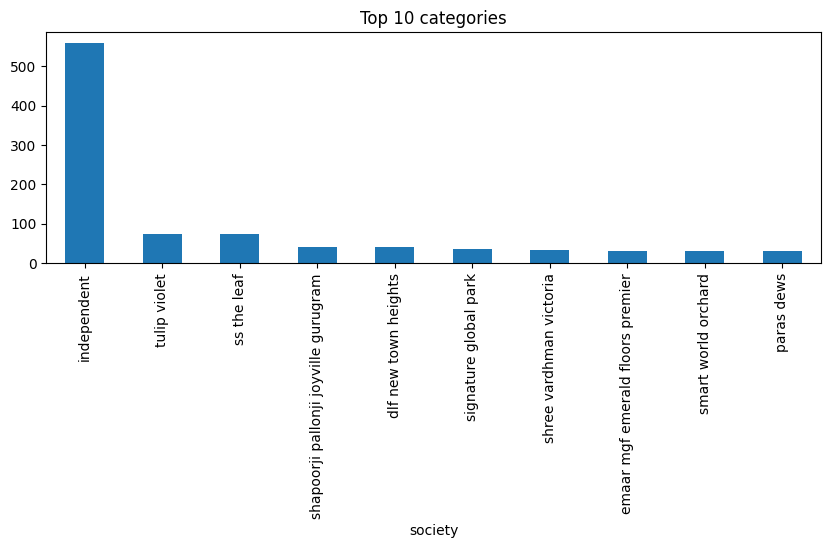

In [450]:
cat_col_summary(data, 'society')

Observation 
- flats are in majority with around 75% of the data and there are less numbers of houses
- there are no missing values in the data
- out of 722 categories of apartments 50% of the data is coming from 75 apartments i.e almost 75 apartments have multiple flats up for sale and that's why it is coveering almost 50% of the data 
- society column explains that: 
    - There are: 
        - 1 apartment with more 100 flats 
        - 2 apartments with 50-100 flats 
        - 86 apartments with 10-49 flats 
        - 287 apartments with 2-9 flats and 
        - 340 apartments with just one flat 
- there is one missing value 

5.2 Sector

Quick glance
2028    sector 102
1105    sector 163
907      sector 82
3534    sector 102
2761     sector 89
2541     sector 33
3128     sector 77
471      sector 78
1632     sector 33
3850     sector 61
Name: sector, dtype: object
Cardinality in the column: 
103
sector
sector 163    154
sector 37     122
sector 85     108
sector 102    108
sector 70     105
sector 92     100
sector 69      93
sector 90      88
sector 109     88
sector 81      87
sector 65      87
sector 48      78
sector 79      77
sector 33      71
sector 50      69
sector 67      68
sector 83      68
sector 104     65
sector 95      63
sector 86      63
sector 108     60
sector 82      60
sector 107     60
sector 89      58
sector 23      57
sector 56      56
sector 3       56
sector 8       55
sector 9       55
sector 26      49
sector 84      49
sector 1       47
sector 66      45
sector 43      44
sector 113     43
sector 99      43
sector 25      42
sector 103     42
sector 61      41
sector 5       40
sector 49 

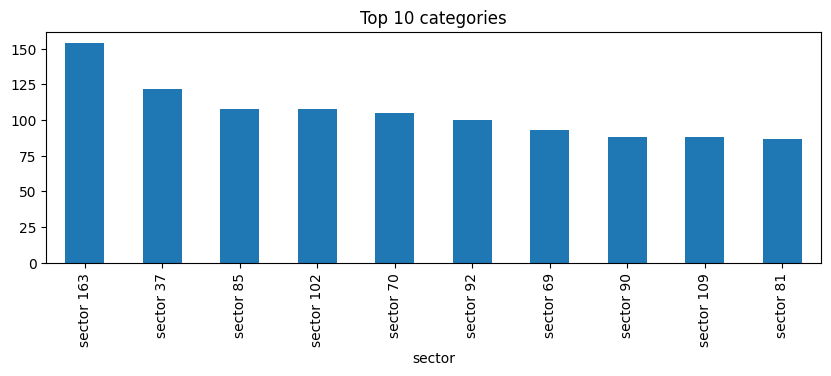

In [451]:
cat_col_summary(data, 'sector')

Observation: 
- There are 103 unique values in the `sectors`. 
- Frequency distribution of sectors: 
    - Very High > 100	:	5
    - High (50-100)	:	23
    - Average (10-49)	:	54
    - Low (2-9)	:	15
    - Very Low (1)	:	4
- there are 0 missing values in this column

5.3 Price

In [452]:
def num_col_summary(df, var):

    print("Quick Glance")
    print(df[var].sample(10))
    print("="*50)
    print()


    # 5 number summary 
    print("Basic summary of the data: ")
    print(df[var].describe())
    print("="*50)

    # skewness and kurtosis 
    print("Skewness: \t{:.2f} ".format(df[var].skew()))
    print("Kurtosis: \t{:.2f}".format(df[var].kurt()))
    print("="*50)

    # missing values 
    print("Number of missing values in the column: ")
    null_values = df[var].isnull()
    print(null_values.sum())
    print("="*50)

    # quantile analysis
    print("Quantile analysis")
    quantiles = df[var].quantile([0.01, 0.05, 0.95, 0.99])
    print(quantiles)

    # identification of outliers using the IQR method
    iqr = df[var].quantile(0.75) - df[var].quantile(0.25)
    print("IQR: ", iqr)
    print("="*50)
    print()

    # shapiro wilk test 
    from scipy import stats 
    alpha = 0.05
    sw_test = stats.shapiro(df[var].dropna().values)
    sw_statistic = sw_test.statistic
    sw_pvalue = sw_test.pvalue
    # print("Significance Leve: ", alpha)
    print("Step 1:Setting up the hypothesis.")
    print("Null hypothesis: Data is Normally Distributed")
    print("Alternate hypothesis: Data is Not Normally Distributed")
    print("Step 2: Setting up the significant level for the test.")
    print("Significance Level: ", alpha)
    print("Step 3: Performing the test.")
    print("Test Statistic: ", round(sw_statistic,4))
    print("Step 4: Calculating the p-value")
    print("Pvalue = ", round(sw_pvalue,9))
    print("Interpration")
    if sw_pvalue < alpha: 
        print(f"Since p-valeu is less than {alpha} we reject the null hypothesis at the significance level {alpha * 100}%")
        print(f"Conclusion: We conclude that the colleced sample data is not normally distributed")
    else: 
        print(f"Since p-valeu is greater than {alpha} we fail to reject the null hypothesis at the significance level {alpha * 100}%")
        print(f"Conclusion: We conclude that the colleced sample data is normally distributed")

    # plot
    plt.figure(figsize= (15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde = True, bins = 50)
    plt.title("Distribution")

    # boxplot 
    plt.subplot(1, 2, 2)
    sns.boxplot(x =df[var], color= 'lightgreen')
    plt.title("Box and whiskers plot")

    


Quick Glance
3614    1.90
3747    3.00
1374    0.25
3183    0.38
2887    0.88
3531    0.94
300     1.70
889     1.50
180     1.35
2263    1.35
Name: price, dtype: float64

Basic summary of the data: 
count    3794.000000
mean        2.489170
std         2.943189
min         0.070000
25%         0.910000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64
Skewness: 	3.33 
Kurtosis: 	15.46
Number of missing values in the column: 
19
Quantile analysis
0.01     0.2493
0.05     0.3700
0.95     8.4140
0.99    15.1280
Name: price, dtype: float64
IQR:  1.79

Step 1:Setting up the hypothesis.
Null hypothesis: Data is Normally Distributed
Alternate hypothesis: Data is Not Normally Distributed
Step 2: Setting up the significant level for the test.
Significance Level:  0.05
Step 3: Performing the test.
Test Statistic:  0.6442
Step 4: Calculating the p-value
Pvalue =  0.0
Interpration
Since p-valeu is less than 0.05 we reject the null hypothesis at the signifi

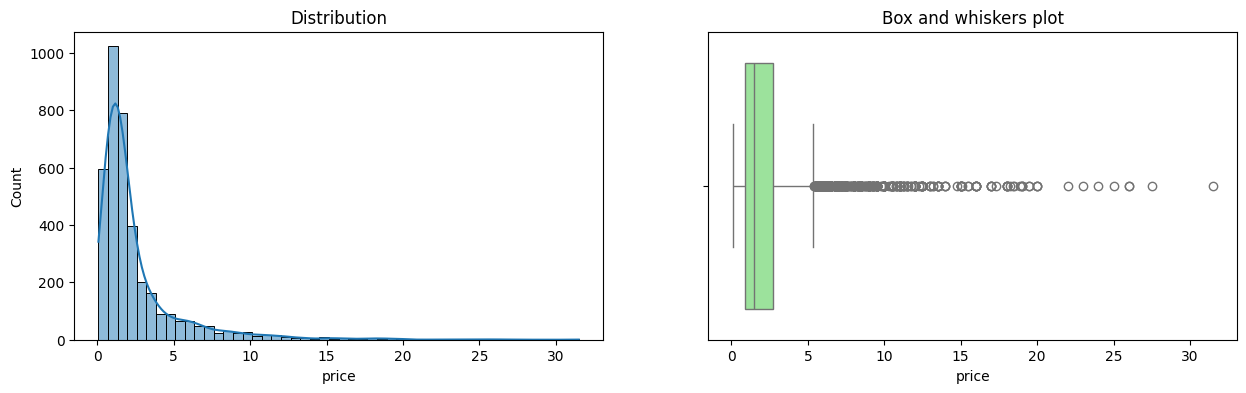

In [453]:
num_col_summary(data, 'price')

Observations:
- The average flat prices in gurgaon is almost 2.5 crores 
- std deviate of the price is 2.9 which shows there is lot of variance in the data 
- Min priced flat in gurgaon is around 7 lakh rupees 
- 25 % of the flats are priced around 91 lakhs 
- median flat prices is around 1.5 crores 

    - Visualization 
        - most costlies flat is priced around 31 crores due to which our data is right skewed. 
        - the price distribution is right skewed which means many flats are less priced and fewer flats are high priced 
        - Box and whisker plot shows the spread of the data and potential outliers. Properites above the price 10 crores can be considered as outliers and they lie beyond the upper whisker of the plot 
        - some flat are priced above the 20-25 crores which can create the bias in our machine learning model 
        - Histogram indicates that most flat prices are below 5 crores while fewer properies prices goes beyond 10 crores 
        
- There are 19 missising values in our data 
- Skewness of 3 is an indication that data is positively skewed. This means that the data is skewed to the right and it has longer right tail which aligns with our observation from the histogram as well. 
- Kurtosis is 15.46. A kurtosis value greater than 3 is an indication that distribution has heavier tails and more outliers compared to the normal distribution. 
- Based on quantile analysis: 
    - 1 % of the flats are priced below 0.25 crores 
    - 5% quantile: 5% of the properties are below 0.37 crores 
    - 95% quantile: 95% of the properties are below 8.41 crores 
    - 99% quantile: 99% of the prorperties are below 15 crores  

In [454]:
# outlier analysis using iqr 

q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)
iqr =q3-q1
print("IQR: ", iqr)

lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
print("lower bound: ", lower_bound, ',', 'upper bound: ', upper_bound)

outliers = data[(data.price < lower_bound) | (data.price > upper_bound)]


IQR:  1.79
lower bound:  -1.775 , upper bound:  5.385


In [455]:
outliers.shape

(430, 23)

In [456]:
outliers.price.describe()

count    430.000000
mean       9.181581
std        4.077361
min        5.400000
25%        6.300000
50%        8.000000
75%       10.557500
max       31.500000
Name: price, dtype: float64

Outlier analysis: 
- Ther are 430 rows which are indicating the presence of outliers. 
- outliers have an average price around 9.18 crores 
- the range of outliers is from 5.40 crores to 31.5 crores 


<Axes: xlabel='price'>

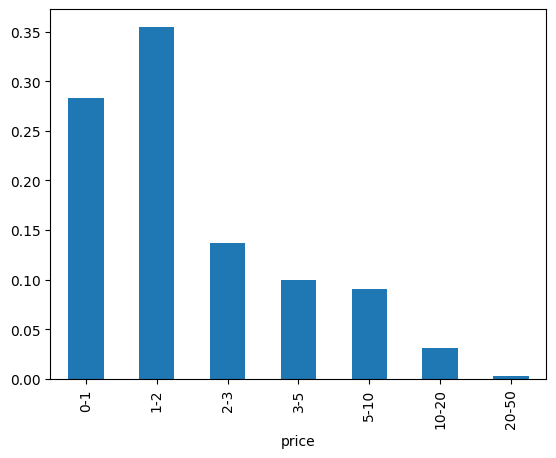

In [457]:
# price binning

bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ['0-1', '1-2', '2-3', '3-5', '5-10', '10-20', '20-50']

(
    pd.cut(data['price'], bins = bins, labels= bin_labels, right= False)
    .value_counts(normalize= True)
    .sort_index()
    .plot(kind = 'bar')
    )



Observation 
- The majority of the properties are priced in the range of `0-3` crores. 
- There is a significant drop in the number of properites priced above 5 crores. 


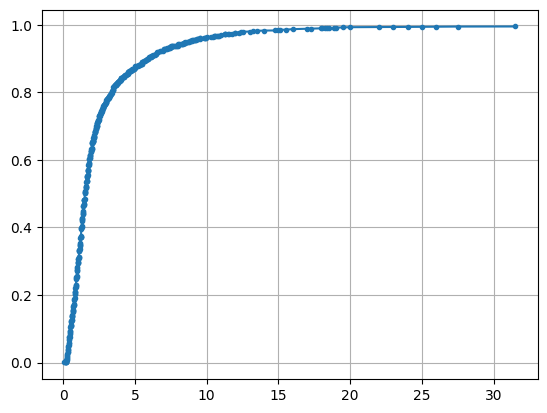

In [458]:
# ecdf analysis

ecdf = data.price.value_counts().sort_index().cumsum() / (len(data.price))
plt.plot(ecdf.index, ecdf, marker = '.', linestyle = None)
plt.grid()

- Around 85% of the data falls below the 5 crores 
- Around 90% of the data is below 10 crores

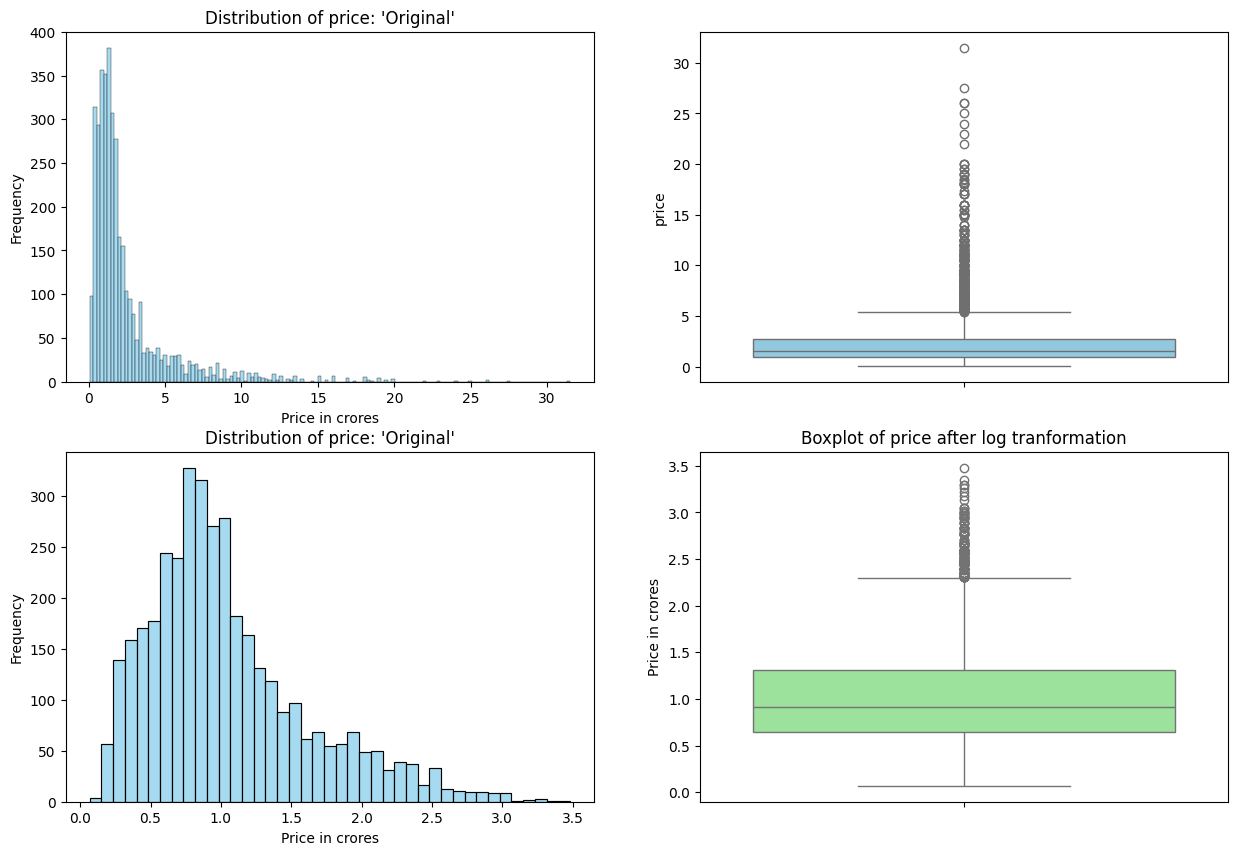

In [459]:
# now since the price column is right skewed we will apply transformation techniques to make it closer to the normal distribution. 

# distribution without log transformation
# histogram
plt.figure(figsize= (15, 10))

plt.subplot(2, 2 , 1)
sns.histplot(data['price'], color= 'skyblue')
plt.title("Distribution of price: 'Original'")
plt.xlabel("Price in crores")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
sns.boxplot(data['price'], color= 'skyblue')


# distribution with log transformation
price_log_trasformed = np.log1p(data['price'])
plt.subplot(2, 2, 3)
sns.histplot(price_log_trasformed, color= 'skyblue')
plt.title("Distribution of price: 'Original'")
plt.xlabel("Price in crores")
plt.ylabel("Frequency")

# boxplot 
plt.subplot(2 ,2, 4)
sns.boxplot(price_log_trasformed, color= 'lightgreen')
plt.title("Boxplot of price after log tranformation")
plt.ylabel("Price in crores")

plt.show()


In [460]:
# shapiro wilk test to check if the log tranformation of the 'price' col has helped or not 

from scipy import stats 

alpha = 0.05 
sw_test, pvalue = stats.shapiro(np.log1p(data['price'].dropna().values))
print(f"Test Statistic: {sw_test}")
print(f"P values = {round(pvalue,4)}")
if pvalue < alpha:
    print("Data is not normally distributed")
else: 
    print("Data is normally distributed")

Test Statistic: 0.9232291119491288
P values = 0.0
Data is not normally distributed


Observtion: 
- 1. After tranforming the data, the high values of the prices are signficant reduced now but it's still it is not able to get closer to the normal distribution. 
- 2. This is verified from the histogram and the shapiro wilk test as well. 
- 3. But this log tranformation significantly reduced the number of outliers which can be verfied with the boxplot. 
- 4. Log transformation will help us to get the improved model performance. 
- 5. Due to less number of data points present in the data we can't remove the outliers. So, we are using log tranformation techniques to tranform the data into normal-like and compressing the outliers using log tranformation. 

5.4 price_per_sq_ft

Quick Glance
1850    230547.0
660       7931.0
679      29545.0
515     600000.0
936       5128.0
3842     14557.0
3216      5000.0
3477     23870.0
3507      6433.0
1721     10416.0
Name: price_per_sq_ft, dtype: float64

Basic summary of the data: 
count      3794.000000
mean      13897.771481
std       22931.157123
min           2.000000
25%        6800.000000
50%        9000.000000
75%       13769.000000
max      600000.000000
Name: price_per_sq_ft, dtype: float64
Skewness: 	11.21 
Kurtosis: 	184.88
Number of missing values in the column: 
19
Quantile analysis
0.01     3151.30
0.05     4666.00
0.95    33333.00
0.99    91045.36
Name: price_per_sq_ft, dtype: float64
IQR:  6969.0

Step 1:Setting up the hypothesis.
Null hypothesis: Data is Normally Distributed
Alternate hypothesis: Data is Not Normally Distributed
Step 2: Setting up the significant level for the test.
Significance Level:  0.05
Step 3: Performing the test.
Test Statistic:  0.2985
Step 4: Calculating the p-value
Pvalue = 

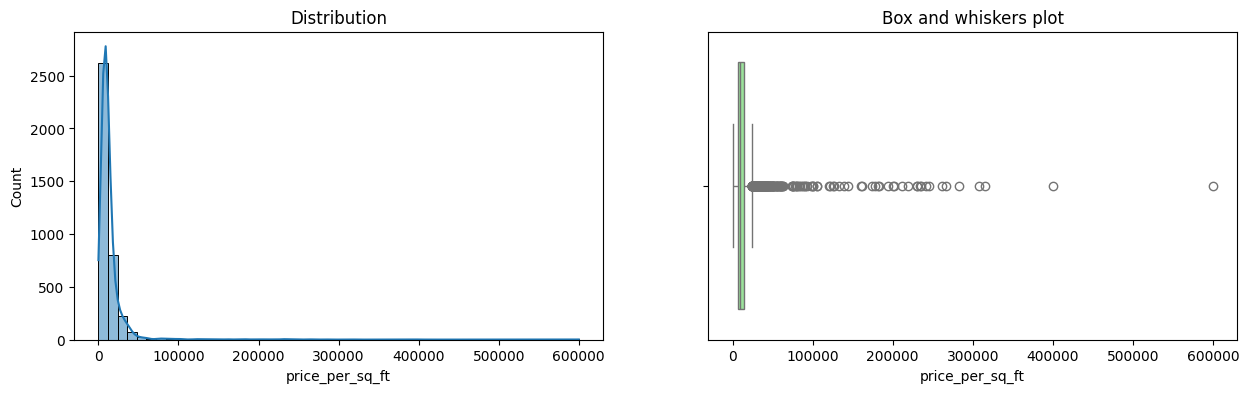

In [461]:
num_col_summary(data, "price_per_sq_ft")

In [462]:
# anderson-darling test to check the tail behaviour 

import scipy.stats as stats

# Performing Anderson-Darling test
result = stats.anderson(data['price_per_sq_ft'].dropna().values)

ad_test_stat = result.statistic
critical_values = result.critical_values
significance_levels = result.significance_level

print("Test Statistic:", ad_test_stat)
print("Critical Values:", critical_values)
print("Significance Levels:", significance_levels)

Test Statistic: 701.5902105870227
Critical Values: [0.575 0.655 0.786 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]


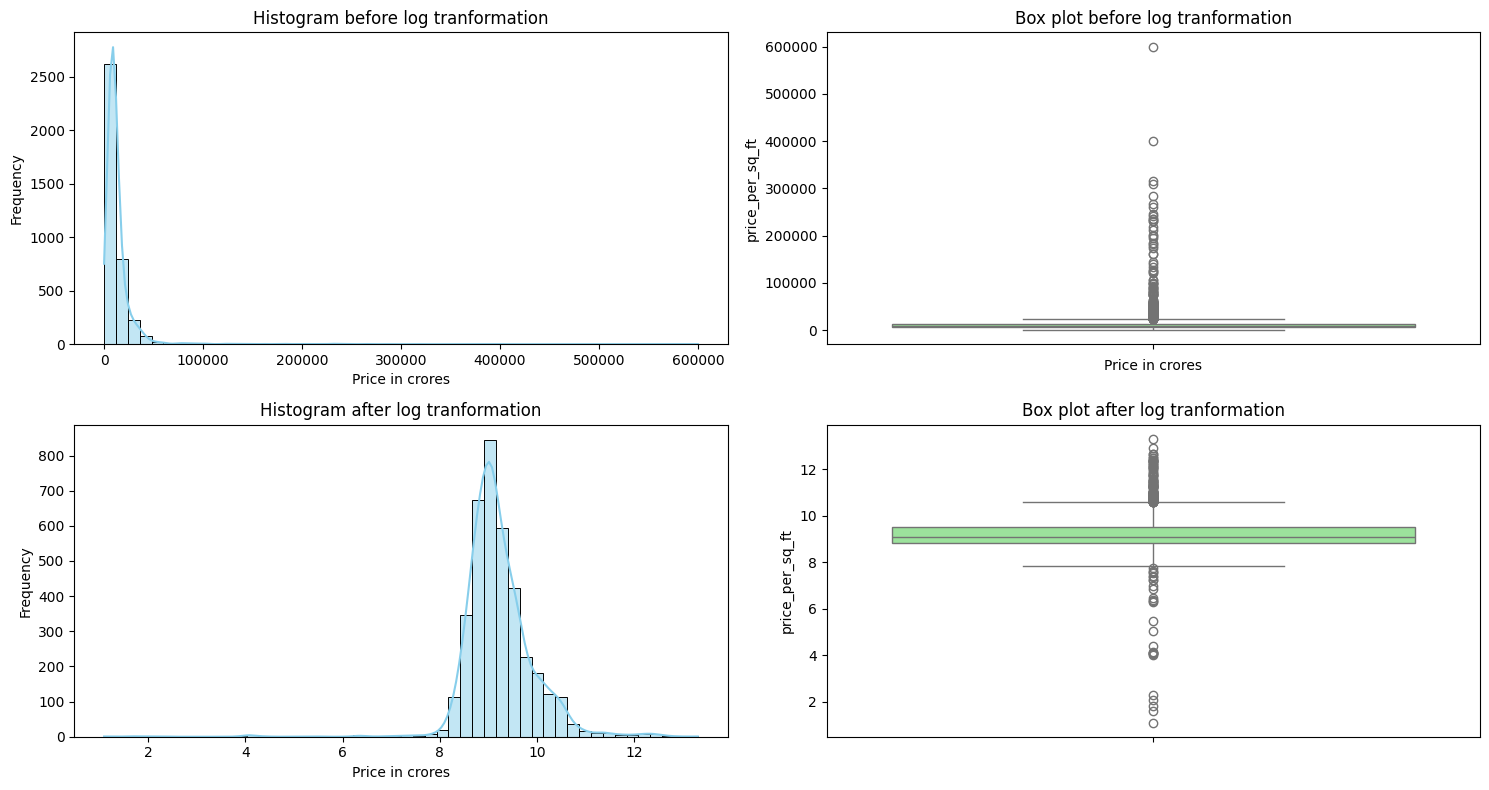

In [463]:
# distribution of prices original and after tranformation 

# histogram 
plt.figure(figsize= (15, 8))

plt.subplot(2,2,1)
sns.histplot(data['price_per_sq_ft'], bins = 50, kde = True, color = 'skyblue') 
plt.title("Histogram before log tranformation")
plt.xlabel("Price in crores")
plt.ylabel("Frequency")

# box plot without tranformation 
plt.subplot(2,2, 2)
sns.boxplot(data['price_per_sq_ft'], color = 'lightgreen')
plt.title("Box plot before log tranformation")
plt.xlabel("Price in crores")

# histogram after log tranformation
plt.subplot(2,2, 3)
sns.histplot(np.log1p(data['price_per_sq_ft']), bins = 50, kde = True, color = 'skyblue') 
plt.title("Histogram after log tranformation")
plt.xlabel("Price in crores")
plt.ylabel("Frequency")

# boxplot after log tranformation
plt.subplot(2, 2,4 )
sns.boxplot(np.log1p(data['price_per_sq_ft']), color = 'lightgreen')
plt.title("Box plot after log tranformation")
plt.tight_layout()
plt.show()




In [464]:
# shapiro wilk test on the tranformed data 

tranformed_pricepersqft = np.log1p(data['price_per_sq_ft'].dropna().values)

sw_test, pvalue = stats.shapiro(tranformed_pricepersqft)
print(f"Test statisic for the shapiro wilk test is: {sw_test}")
print(f"P value for the shapiro wilk test is {value}")
alpha = 0.05 

if pvalue < 0.05: 
    print("Even after log tranformation the data is not following the normal distribution")
else: 
    print("After log tranfomation the data now follows the normal distribution")

Test statisic for the shapiro wilk test is: 0.823781506074323
P value for the shapiro wilk test is 340
Even after log tranformation the data is not following the normal distribution


In [465]:
# outliers analysi

iqr = data.price_per_sq_ft.quantile(0.75) - data.price_per_sq_ft.quantile(0.25)
lower_bound, upper_bound = (data.price_per_sq_ft.quantile(0.25) - (1.5*iqr)), (data.price_per_sq_ft.quantile(0.75) + (1.5*iqr))
print(f"Lower bound is {lower_bound} and upper bound is {upper_bound}")

outliers = data[(data.price_per_sq_ft < lower_bound) | ((data.price_per_sq_ft > upper_bound))]
outliers.shape

Lower bound is -3653.5 and upper bound is 24222.5


(370, 23)

Observation: 
- Various critical values at differnt significance level indicates the data is following normal distribution or not at that significance level. 
- A very high critical value at 1% significance level indicates that even at 1% the data is not following the normal distribution which means there is a heavy tail. 
This indicates that there are high values and frequency of outliers. 
- This can be validated from the histogram and box plot as well. 
- Skewness = 11, indicates that our data has right tail and it is positive skewed. This is validated from the histogram as well. 
- Kurtosis is very high, this indicates there are high number of outliers present in our data. 
- The mean per square feet prices of the flat is almost 13000 rupees. This indicates that the flats are on the expensive side in gurgaon. 
- Minimum per square feet price is 2 which is quite abnormal we we look at the other quantiles values. This means that there is some flat which is priced at 2 rupees per square feet, which has to be an outlier or a wrong inforamation. 
- Standard deviation is very high at almost 23000. This indicates that there is large variablity in our data. 
- 25% of the flats have per square feet price less than 6800. 
- 50% of the flats have per square feet price less than 9000, which is actually a better representation of the flats in gurgaon. 
- 75% of the flats have per square feet price less than 14000
- Maximum per square feet price is 600000 which is significantly greater than the rest 75% of the prices which indicates the presence of outliers.Also this is a very high price for any flat in any city. 
- There are 19 missing values in the data. 
- To make this column fit for our machine learning model we can either transform this column using log tranformation or completely remove the outliers.  
- Log tranformation has significanly reduced the number of outliers in the data which can be verified from before-after box plots and histgram. 
- Although the log tranformed data may look like the normal distribution from the histogram it's not completely normal which can be verified from the shapiro wilk test. 
- This log tranformation will help in improved model performance 
- There are almost 370 rows with outliers. So we can't directly remove the outliers as this is a signifcantly greater portion of the data, therefore we will look for other alternative methods. 

5.5 bedRoom

Quick glance
3713    4
431     3
3249    4
2253    3
3602    4
434     3
1945    3
3467    2
3603    4
512     3
Name: bedRoom, dtype: int64
Cardinality in the column: 
21
bedRoom
3     1530
2      977
4      686
5      222
1      134
6       82
9       45
8       32
7       31
12      26
10      21
16      12
13       4
19       2
18       2
11       2
14       1
21       1
36       1
34       1
20       1
Name: count, dtype: int64
Number of missing values in the column: 
0


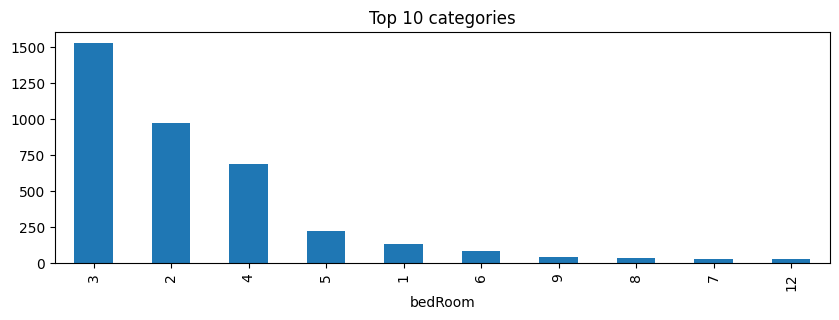

In [466]:
cat_col_summary(data, 'bedRoom')

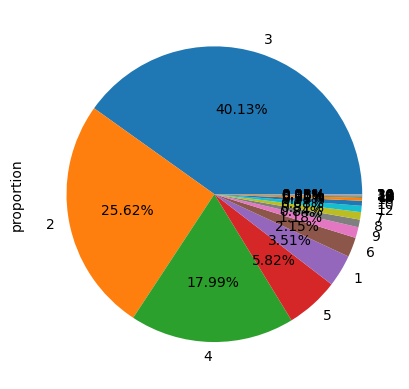

In [467]:
data['bedRoom'].value_counts(normalize=True).plot(kind = 'pie', autopct = "%0.2f%%")
plt.show()

Observation 
- This is a categorical column with 21 different categories. 
- Most of the values are in the categories of 1, 2, 3, 4, 5 and 6 but there are some properties with very high number of bedrooms. This indicates the presence of outliers. 
- There aren't any missing values in this column. 
- 40% of the properties have 3 bedrooms. 
- 25% of the properties have 2 bedroomms. 
- 18% of the properites have 4 bedrooms and 
- 3.5% of the properties have 1 bedrooms. 
- Rest 12% of properties have more than 4 bedrooms. 
- This also aligns with our earlier observation that some properties have high prices and that may be possible because there are higher number of bedrooms. Usually properites with high number of bedrooms will be larger on size and therefore they are more expensive than the others. 

5.6 bathroom 

Quick glance
1245    6
981     3
359     3
2881    2
2055    4
283     5
2547    5
686     5
218     3
1076    2
Name: bathroom, dtype: int64
Cardinality in the column: 
21
bathroom
3     1116
2     1095
4      839
5      301
1      169
6      120
7       43
9       42
8       26
12      21
10      11
16       8
18       4
13       4
11       4
20       3
17       3
14       1
21       1
36       1
34       1
Name: count, dtype: int64
Number of missing values in the column: 
0


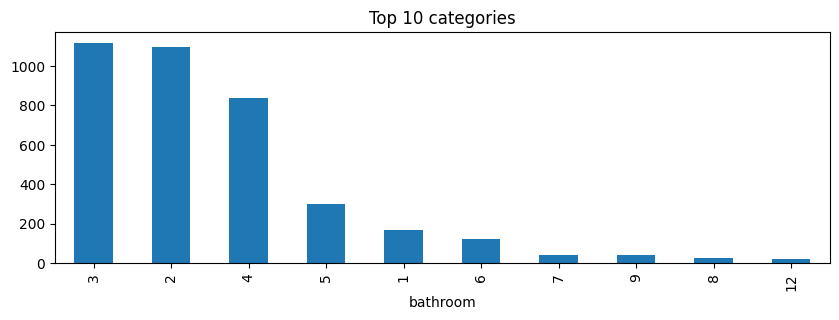

In [468]:
cat_col_summary(data, 'bathroom')

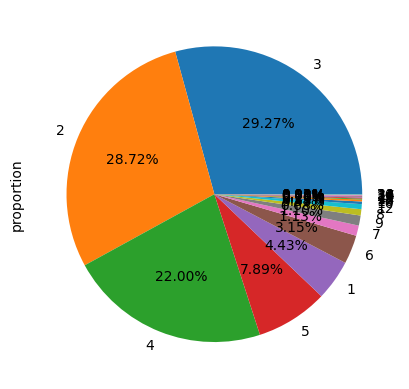

In [469]:
data.bathroom.value_counts(normalize=True).plot(kind = 'pie', autopct = "%0.2f%%")
plt.show()

Observations
- bathroom column represents the number of bathrooms in a property. 
- It has 21 different categories, which represent the number of bathrooms in a property i.e in our data there are properties which have the bathrooms in the range of 1 to 21. 
- Most of the flats have bathroom in the range of 1-6. 
- Pie chart shows that, there are 29% of the properties which have 3 bathrooms. 
- 28% of the properities have 2 bathrooms. 
- 22% of the properties have 4 bathrooms. 
- 7% of the properties have 5 bathrooms and 
- 4.5% of the properties have 1 bathrooms
- Rest have more than 5 bathrooms, which aligns with our earlier observations that some properties have higher prices because they have more number of bedrooms and bathrooms. 
- These relationship between number of bedrooms and bathrooms indicates the presence of multicollinearity. 

5.7 balcony

Quick glance
3388    3+
626     3+
3783    3+
1303    3+
1365     1
1297     3
3392     3
1490     3
3484     3
2050     3
Name: balcony, dtype: object
Cardinality in the column: 
5
balcony
3+    1188
3     1097
2      925
1      403
No     200
Name: count, dtype: int64
Number of missing values in the column: 
0


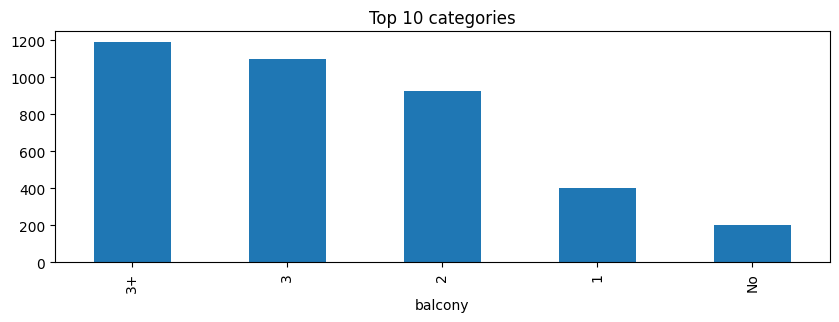

In [470]:
cat_col_summary(data, 'balcony')

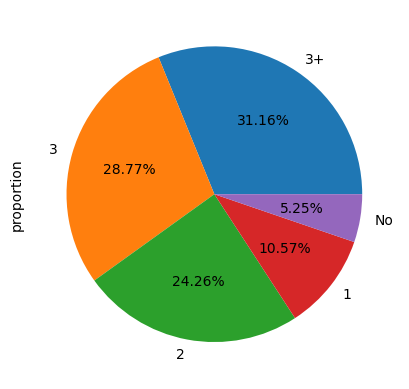

In [471]:
data.balcony.value_counts(normalize=True).plot(kind = 'pie', autopct = '%0.2f%%')
plt.show()

Observation: 
- This column represents the number of balconies in a property. 
- In our data, we have the record of properties which have balconies in the range of 0-3+. 
- There aren't any missing value in our data. 
- 31% of the properties have more than 3 balconies. 
- 29% of the properties have 3 balconies. 
- 24% of the properties have 2 balconies. 
- 10.5% of the properties have 1 balcony. 
- There are 5% of the properties without any balcony. 